In [47]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
from scipy import stats

# Import API key
#from secret import api_key_w
api_key = "c49e94f29f9eff614a3e7cbf6f6876d5"
# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "/Users/marinaduarte/Documents/python-api-challenge/WeatherPy/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

In [5]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)


626

In [6]:
coords = pd.DataFrame({
    "latitude": lats,
    "longitude": lngs})

coords.head()

,latitude,longitude
0,73.143600,53.171100
1,-55.865978,-102.068013
2,-71.391744,13.630910
3,10.168722,-98.176731
4,0.346730,-27.393269


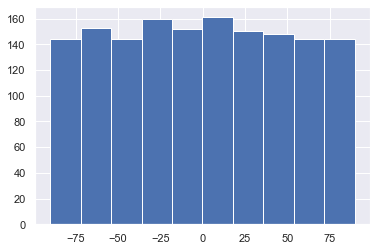

In [7]:
# Check if we have a good population of lats and longs.
import seaborn

seaborn.set()

plt.hist(coords['latitude'])
plt.show()

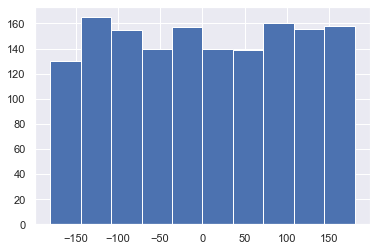

In [8]:
plt.hist(coords['longitude'])
plt.show()

In [9]:
url = "http://api.openweathermap.org/data/2.5/weather?"
testresponse = requests.get(url + "appid=" + api_key + "&q=" + cities[0]).json()
testresponse

{'cod': '404', 'message': 'city not found'}

In [10]:
url = "http://api.openweathermap.org/data/2.5/weather?"
#columns = ["City", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed", "Country", "Date"]

City = []
Lat = []
Lng = []
Max_Temp = []
Humidity = []
Cloudiness = []
Wind_Speed = []
Country = []
Date = []

for x in range(len(cities)):
    try:
        print(f"Processing record {x} | {cities[x]}")

    # Get one of the cities
        response = requests.get(url + "appid=" + api_key + "&q=" + cities[x]).json()

    # Save post's JSON
        City.append(response['name'])
        Lat.append(response['coord']['lat'])
        Lng.append(response['coord']['lon'])
        Max_Temp.append(response['main']['temp_max'])
        Humidity.append(response['main']['humidity'])
        Cloudiness.append(response['clouds']['all'])
        Wind_Speed.append(response['wind']['speed'])
        Country.append(response['sys']['country'])
        Date.append(response['dt'])
        
        time.sleep(1)
    except(KeyError, IndexError):
        print("City Not Found. Skipping...")

Processing record 0 | belushya guba
City Not Found. Skipping...
Processing record 1 | punta arenas
Processing record 2 | hermanus
Processing record 3 | puerto escondido
Processing record 4 | touros
Processing record 5 | mataura
Processing record 6 | cairns
Processing record 7 | auki
Processing record 8 | kumasi
Processing record 9 | atuona
Processing record 10 | novobiryusinskiy
Processing record 11 | novikovo
Processing record 12 | sentyabrskiy
City Not Found. Skipping...
Processing record 13 | cacota
Processing record 14 | torbay
Processing record 15 | port alfred
Processing record 16 | namatanai
Processing record 17 | lebu
Processing record 18 | fort nelson
Processing record 19 | klaksvik
Processing record 20 | carnarvon
Processing record 21 | port hardy
Processing record 22 | goure
Processing record 23 | ushuaia
Processing record 24 | cherskiy
Processing record 25 | illoqqortoormiut
City Not Found. Skipping...
Processing record 26 | rikitea
Processing record 27 | vanavara
Processin

Processing record 235 | mareeba
Processing record 236 | yumen
Processing record 237 | airai
Processing record 238 | faanui
Processing record 239 | saint-leu
Processing record 240 | raudeberg
Processing record 241 | clyde river
Processing record 242 | jiangkou
Processing record 243 | ponta do sol
Processing record 244 | karatuzskoye
Processing record 245 | quelimane
Processing record 246 | muisne
Processing record 247 | ola
Processing record 248 | komsomolskiy
Processing record 249 | snezhnogorsk
Processing record 250 | den helder
Processing record 251 | qasigiannguit
Processing record 252 | masterton
Processing record 253 | carutapera
Processing record 254 | garowe
Processing record 255 | fort saint john
City Not Found. Skipping...
Processing record 256 | valle de allende
Processing record 257 | kalmunai
Processing record 258 | benjamin aceval
Processing record 259 | ler
Processing record 260 | vila velha
Processing record 261 | susanville
Processing record 262 | grand river south east

Processing record 465 | sao felix do xingu
Processing record 466 | bowling green
Processing record 467 | sorvag
City Not Found. Skipping...
Processing record 468 | taraz
Processing record 469 | verkhnyaya inta
Processing record 470 | narwar
Processing record 471 | cermik
Processing record 472 | mayakonda
Processing record 473 | grindavik
Processing record 474 | kojnare
Processing record 475 | campo maior
Processing record 476 | cabo san lucas
Processing record 477 | husavik
Processing record 478 | port lincoln
Processing record 479 | riyadh
Processing record 480 | santa isabel
Processing record 481 | greytown
Processing record 482 | vila
Processing record 483 | asadabad
Processing record 484 | santa rosa
Processing record 485 | san andres
Processing record 486 | olafsvik
Processing record 487 | pevek
Processing record 488 | mandalgovi
Processing record 489 | thaba-tseka
Processing record 490 | loanda
Processing record 491 | saldanha
Processing record 492 | bonthe
Processing record 493 

In [21]:
#Converts a Kelvin temperature to Fahrenheit
def k_to_f(temp):
    return temp * 9/5 - 459.67

#Converts a meters/s speed to miles/hour
def mps_to_mph(speed):
    return speed * 2.23694

weather_dict = {
    "City": City,
    "Lat": Lat,
    "Lng": Lng,
    "Max Temp": Max_Temp,
    "Humidity": Humidity,
    "Cloudiness": Cloudiness,
    "Wind Speed": Wind_Speed,
    "Country": Country,
    "Date": Date,
}
weather_data = pd.DataFrame(weather_dict)
weather_data['Max Temp'] = k_to_f(weather_data['Max Temp'])
weather_data['Wind Speed'] = mps_to_mph(weather_data['Wind Speed'])
weather_data.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Punta Arenas,-53.15,-70.92,44.600,65,40,36.909510,CL,1603139877
1,Hermanus,-34.42,19.23,55.004,79,100,14.763804,ZA,1603139757
2,Puerto Escondido,15.85,-97.07,86.000,70,20,4.697574,MX,1603139880
3,Touros,-5.20,-35.46,80.600,69,40,10.289924,BR,1603139225
4,Mataura,-46.19,168.86,46.004,83,81,8.992499,NZ,1603139423


In [22]:
weather_data.to_csv('cities.csv')

In [23]:
weather_data.describe()

,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Date
count,579.000000,579.000000,579.000000,579.000000,579.000000,579.000000,5.790000e+02
mean,18.232815,19.182297,62.205803,71.445596,51.103627,7.695962,1.603140e+09
std,32.532861,87.887439,20.052109,21.599734,39.347880,5.409925,3.600015e+02
min,-54.800000,-179.170000,7.970000,7.000000,0.000000,0.313172,1.603139e+09
25%,-8.150000,-56.120000,47.120000,63.500000,7.500000,3.713320,1.603140e+09
50%,20.120000,22.660000,67.352000,77.000000,51.000000,6.800298,1.603140e+09
75%,45.100000,94.035000,78.044000,87.000000,90.000000,10.289924,1.603140e+09
max,78.220000,179.320000,100.400000,100.000000,100.000000,38.027980,1.603141e+09


In [25]:
weather_data2 = weather_data.loc[weather_data['Humidity']<101]
weather_data2.describe()

,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Date
count,579.000000,579.000000,579.000000,579.000000,579.000000,579.000000,5.790000e+02
mean,18.232815,19.182297,62.205803,71.445596,51.103627,7.695962,1.603140e+09
std,32.532861,87.887439,20.052109,21.599734,39.347880,5.409925,3.600015e+02
min,-54.800000,-179.170000,7.970000,7.000000,0.000000,0.313172,1.603139e+09
25%,-8.150000,-56.120000,47.120000,63.500000,7.500000,3.713320,1.603140e+09
50%,20.120000,22.660000,67.352000,77.000000,51.000000,6.800298,1.603140e+09
75%,45.100000,94.035000,78.044000,87.000000,90.000000,10.289924,1.603140e+09
max,78.220000,179.320000,100.400000,100.000000,100.000000,38.027980,1.603141e+09


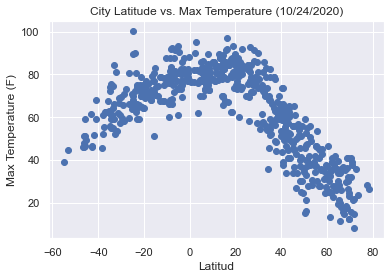

<Figure size 432x288 with 0 Axes>

In [39]:
plt.scatter(weather_data2['Lat'], weather_data2['Max Temp'])
plt.xlabel("Latitud")
plt.ylabel("Max Temperature (F)")
plt.title("City Latitude vs. Max Temperature (10/24/2020)")
plt.show()
plt.savefig('lat vs max temp.png')

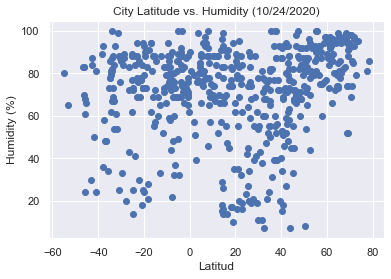

<Figure size 432x288 with 0 Axes>

In [40]:
plt.scatter(weather_data2['Lat'], weather_data2['Humidity'])
plt.xlabel("Latitud")
plt.ylabel("Humidity (%)")
plt.title("City Latitude vs. Humidity (10/24/2020)")
plt.show()
plt.savefig('lat vs humidity.png')

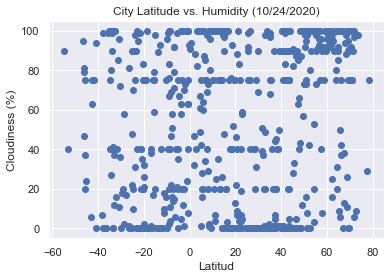

<Figure size 432x288 with 0 Axes>

In [41]:
plt.scatter(weather_data2['Lat'], weather_data2['Cloudiness'])
plt.xlabel("Latitud")
plt.ylabel("Cloudiness (%)")
plt.title("City Latitude vs. Humidity (10/24/2020)")
plt.show()
plt.savefig('lat vs cloudiness.png')

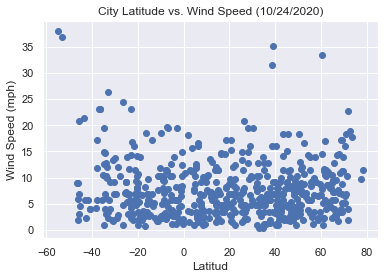

<Figure size 432x288 with 0 Axes>

In [42]:
plt.scatter(weather_data2['Lat'], weather_data2['Wind Speed'])
plt.xlabel("Latitud")
plt.ylabel("Wind Speed (mph)")
plt.title("City Latitude vs. Wind Speed (10/24/2020)")
plt.show()
plt.savefig('lat vs wind speed.png')

In [44]:
weather_dataN = weather_data2.loc[weather_data['Lat']>0]
weather_dataS = weather_data2.loc[weather_data['Lat']<=0]

The r-value is: 0.7797596400174688


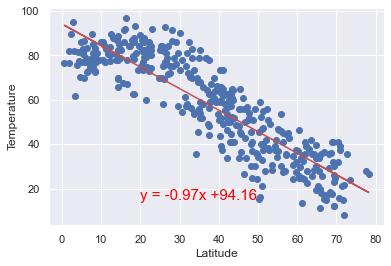

In [49]:
# Perform a linear regression on temperature vs. latitude N
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(weather_dataN['Lat'], weather_dataN['Max Temp'])

# Get regression values
regress_values = weather_dataN['Lat'] * slope + intercept
# Create line equation string
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))

# Create Plot
plt.scatter(weather_dataN['Lat'],weather_dataN['Max Temp'])
plt.plot(weather_dataN['Lat'],regress_values,"r-")

# Label plot and annotate the line equation
plt.xlabel('Latitude')
plt.ylabel('Temperature')
plt.annotate(line_eq,(20,15),fontsize=15,color="red")

# Print r value
print(f"The r-value is: {rvalue**2}")

# Show plot
plt.show()

The r-value is: 0.5509003140456875


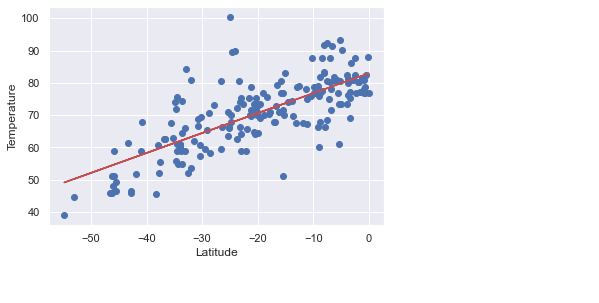

In [50]:
# Perform a linear regression on temperature vs. latitude N
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(weather_dataS['Lat'], weather_dataS['Max Temp'])

# Get regression values
regress_values = weather_dataS['Lat'] * slope + intercept
# Create line equation string
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))

# Create Plot
plt.scatter(weather_dataS['Lat'],weather_dataS['Max Temp'])
plt.plot(weather_dataS['Lat'],regress_values,"r-")

# Label plot and annotate the line equation
plt.xlabel('Latitude')
plt.ylabel('Temperature')
plt.annotate(line_eq,(20,15),fontsize=15,color="red")

# Print r value
print(f"The r-value is: {rvalue**2}")

# Show plot
plt.show()

The r-value is: 0.07556713852021693


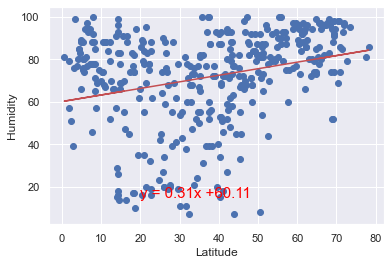

In [51]:
# Perform a linear regression on temperature vs. latitude N
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(weather_dataN['Lat'], weather_dataN['Humidity'])

# Get regression values
regress_values = weather_dataN['Lat'] * slope + intercept
# Create line equation string
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))

# Create Plot
plt.scatter(weather_dataN['Lat'],weather_dataN['Humidity'])
plt.plot(weather_dataN['Lat'],regress_values,"r-")

# Label plot and annotate the line equation
plt.xlabel('Latitude')
plt.ylabel('Humidity')
plt.annotate(line_eq,(20,15),fontsize=15,color="red")

# Print r value
print(f"The r-value is: {rvalue**2}")

# Show plot
plt.show()

The r-value is: 0.011292724378384546


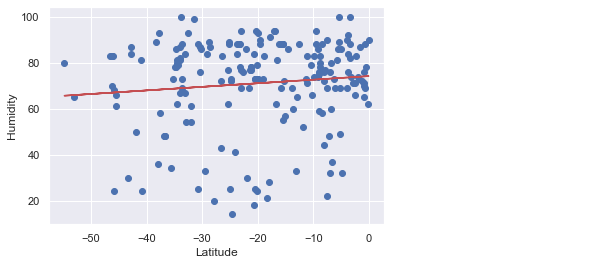

In [52]:
# Perform a linear regression on temperature vs. latitude N
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(weather_dataS['Lat'], weather_dataS['Humidity'])

# Get regression values
regress_values = weather_dataS['Lat'] * slope + intercept
# Create line equation string
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))

# Create Plot
plt.scatter(weather_dataS['Lat'],weather_dataS['Humidity'])
plt.plot(weather_dataS['Lat'],regress_values,"r-")

# Label plot and annotate the line equation
plt.xlabel('Latitude')
plt.ylabel('Humidity')
plt.annotate(line_eq,(20,15),fontsize=15,color="red")

# Print r value
print(f"The r-value is: {rvalue**2}")

# Show plot
plt.show()

The r-value is: 0.041389392249155006


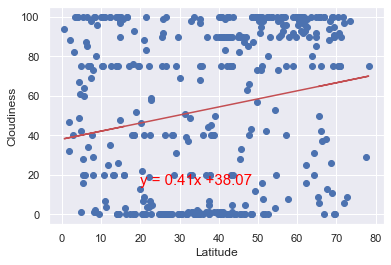

In [53]:
# Perform a linear regression on temperature vs. latitude N
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(weather_dataN['Lat'], weather_dataN['Cloudiness'])

# Get regression values
regress_values = weather_dataN['Lat'] * slope + intercept
# Create line equation string
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))

# Create Plot
plt.scatter(weather_dataN['Lat'],weather_dataN['Cloudiness'])
plt.plot(weather_dataN['Lat'],regress_values,"r-")

# Label plot and annotate the line equation
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
plt.annotate(line_eq,(20,15),fontsize=15,color="red")

# Print r value
print(f"The r-value is: {rvalue**2}")

# Show plot
plt.show()

The r-value is: 0.00014526085728960514


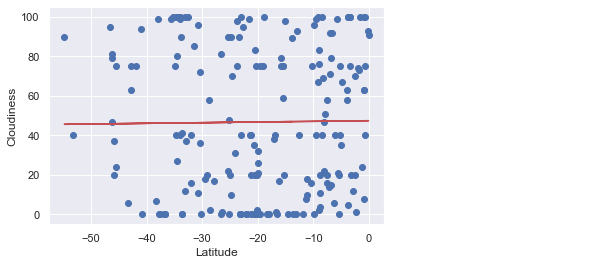

In [54]:
# Perform a linear regression on temperature vs. latitude N
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(weather_dataS['Lat'], weather_dataS['Cloudiness'])

# Get regression values
regress_values = weather_dataS['Lat'] * slope + intercept
# Create line equation string
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))

# Create Plot
plt.scatter(weather_dataS['Lat'],weather_dataS['Cloudiness'])
plt.plot(weather_dataS['Lat'],regress_values,"r-")

# Label plot and annotate the line equation
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
plt.annotate(line_eq,(20,15),fontsize=15,color="red")

# Print r value
print(f"The r-value is: {rvalue**2}")

# Show plot
plt.show()

The r-value is: 0.010551819692684438


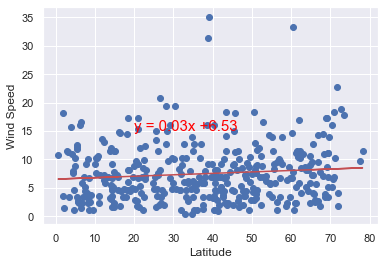

In [55]:
# Perform a linear regression on temperature vs. latitude N
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(weather_dataN['Lat'], weather_dataN['Wind Speed'])

# Get regression values
regress_values = weather_dataN['Lat'] * slope + intercept
# Create line equation string
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))

# Create Plot
plt.scatter(weather_dataN['Lat'],weather_dataN['Wind Speed'])
plt.plot(weather_dataN['Lat'],regress_values,"r-")

# Label plot and annotate the line equation
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
plt.annotate(line_eq,(20,15),fontsize=15,color="red")

# Print r value
print(f"The r-value is: {rvalue**2}")

# Show plot
plt.show()

The r-value is: 0.07726160020907179


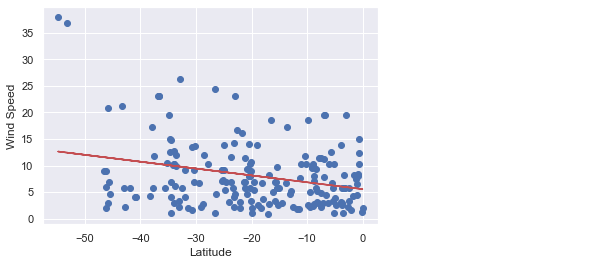

In [56]:
# Perform a linear regression on temperature vs. latitude N
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(weather_dataS['Lat'], weather_dataS['Wind Speed'])

# Get regression values
regress_values = weather_dataS['Lat'] * slope + intercept
# Create line equation string
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))

# Create Plot
plt.scatter(weather_dataS['Lat'],weather_dataS['Wind Speed'])
plt.plot(weather_dataS['Lat'],regress_values,"r-")

# Label plot and annotate the line equation
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
plt.annotate(line_eq,(20,15),fontsize=15,color="red")

# Print r value
print(f"The r-value is: {rvalue**2}")

# Show plot
plt.show()